# Data understanding 


First of all we import the libraries

In [3]:
import math
import numpy as np
import pandas as pd 
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from scipy.stats import pearsonr

In [35]:
df=pd.read_csv("../dataset-progetto/train.csv", skipinitialspace=True)

-	What kind of attributes do we have?
-	How is the data quality?
-	Does a visualization help?
-	Are attributes correlated?
-	What about outliers?
-	How are missing values handled?
-	Do we need to extract other attributes?

## What kind of attributes do we have?

In [37]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,1.0,0.0975,0.302000,0.53600,0.281,0.6350,142.221,241760,4.0,567.0,141.0,NaN,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,0.0,0.0805,0.283000,0.93400,0.360,0.0336,75.596,444000,4.0,617.0,155.0,NaN,2.367412,iranian
2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,NaN,0.0397,0.000089,0.80000,0.262,0.4890,116.628,333507,4.0,652.0,162.0,NaN,3.700483,black-metal
3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,1.0,0.0765,0.066400,0.00127,0.117,0.3850,140.880,269800,4.0,619.0,155.0,0.469,1.279305,bluegrass
4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,1.0,0.0539,0.000576,0.09690,0.299,0.6370,143.956,307652,4.0,733.0,183.0,NaN,4.067086,happy


In [6]:
df.shape

(15000, 24)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   15000 non-null  object 
 1   duration_ms            15000 non-null  int64  
 2   explicit               15000 non-null  bool   
 3   popularity             15000 non-null  int64  
 4   artists                15000 non-null  object 
 5   album_name             15000 non-null  object 
 6   danceability           15000 non-null  float64
 7   energy                 15000 non-null  float64
 8   key                    15000 non-null  int64  
 9   loudness               15000 non-null  float64
 10  mode                   10550 non-null  float64
 11  speechiness            15000 non-null  float64
 12  acousticness           15000 non-null  float64
 13  instrumentalness       15000 non-null  float64
 14  liveness               15000 non-null  float64
 15  va

In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df.describe(include="all")

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
count,15000,1.500000e+04,15000,15000.000000,15000,15000,15000.000000,15000.000000,15000.000000,15000.000000,10550.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,12938.000000,15000.000000,15000.00000,2217.000000,15000.000000,15000
unique,15000,NaN,2,NaN,6257,9820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
top,Long Road,NaN,False,NaN,Vybz Kartel,The Hardcore Archive Part 3 (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,j-dance
freq,1,NaN,14034,NaN,80,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,750
mean,NaN,2.468075e+05,NaN,27.423667,NaN,NaN,0.551063,0.656231,5.287867,-8.894999,0.631374,0.083779,0.303896,0.286734,0.216790,0.436853,123.116544,2.467947e+05,3.876179,501.862333,128.39340,0.490479,2.199647,NaN
std,NaN,1.279941e+05,NaN,18.587534,NaN,NaN,0.194239,0.264371,3.585023,6.005799,0.482455,0.086709,0.329536,0.382930,0.195295,0.277220,31.930958,1.279850e+05,0.566491,280.689804,75.11391,0.291330,1.212616,NaN
min,NaN,8.586000e+03,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.587000e+03,0.000000,0.000000,0.00000,0.000000,0.748116,NaN
25%,NaN,1.800000e+05,NaN,14.000000,NaN,NaN,0.441000,0.480000,2.000000,-10.636250,0.000000,0.037300,0.009745,0.000000,0.097900,0.196000,99.939000,1.800000e+05,4.000000,327.000000,83.00000,0.230000,1.170953,NaN
50%,NaN,2.278260e+05,NaN,24.000000,NaN,NaN,0.580000,0.709000,5.000000,-7.303000,1.000000,0.051000,0.155000,0.003130,0.131000,0.416000,124.188000,2.278185e+05,4.000000,461.000000,117.00000,0.480000,1.738916,NaN
75%,NaN,2.889030e+05,NaN,42.000000,NaN,NaN,0.695000,0.884000,8.000000,-5.101000,1.000000,0.088600,0.573000,0.744000,0.280000,0.664000,141.986500,2.889030e+05,4.000000,625.000000,159.00000,0.739000,3.349057,NaN


## How is the data quality?

Valori duplicati nel DataFrame

In [9]:
duplicate_rows = df.duplicated()

rows= duplicate_rows.any()

# Stampa il risultato
if rows:
    print("There are some duplicated rows in the DataFrame.")
else:
    print("There aren't duplicated rows in the DataFrame.")

There aren't duplicated rows in the DataFrame.


In [70]:
attributes = ["name", "artists", "album_name", "genre"] 

for att in attributes:
    duplicate_rows = df[att].duplicated()
    num_duplicates = duplicate_rows.sum()
    if num_duplicates > 0:
        print(f"There are {num_duplicates} duplicated rows in the '{att}' attribute.\n")
    else:
        print(f"There aren't duplicated rows in the '{att}' attribute\n")


There aren't duplicated rows in the 'name' attribute

There are 8743 duplicated rows in the 'artists' attribute.

There are 5180 duplicated rows in the 'album_name' attribute.

There are 14980 duplicated rows in the 'genre' attribute.



We notice that all the attributes that indicate the "genre" of the songs have the same frequency (quante volte è ripetuto quel genere)

In [11]:
genre_counts = df['genre'].value_counts()
print(genre_counts) 

j-dance          750
iranian          750
brazil           750
chicago-house    750
forro            750
idm              750
indian           750
study            750
disney           750
afrobeat         750
mandopop         750
techno           750
sleep            750
spanish          750
j-idol           750
industrial       750
happy            750
bluegrass        750
black-metal      750
breakbeat        750
Name: genre, dtype: int64


Gli artisti più frequenti

In [12]:
artists_counts = df['artists'].value_counts()
print(artists_counts.head(10))

Vybz Kartel                    80
Germaine Franco                75
Scooter                        74
Sarah, the Illstrumentalist    69
Jay Chou                       67
The Prophet                    64
Alphaxone                      56
Shiritsu Ebisu Chugaku         53
Nogizaka46                     53
Rammstein                      53
Name: artists, dtype: int64


Questo era solo per curiosità

In [32]:
import re

def contains_non_latin_characters(string):
    return bool(re.search('[^\u0000-\u007f]', string))

non_latin = df['name'].apply(contains_non_latin_characters)

df_non_latin=df[non_latin]
print(len(df_non_latin))


2558


## Correlation

In [14]:
df.corr(method="pearson").style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

,duration_ms,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing
duration_ms,1.000000,-0.048723,-0.076202,-0.080932,0.102996,0.016712,0.039403,-0.023310,-0.074774,-0.184902,0.079685,-0.021184,-0.141938,0.048765,0.999918,0.009033,0.839313,0.838041,-0.005830,-0.010400
explicit,-0.048723,1.000000,-0.013096,0.056992,0.124405,-0.000991,0.131777,-0.042846,0.294287,-0.113975,-0.125101,0.006995,0.008631,0.016972,-0.048699,0.051260,-0.039830,-0.039435,0.029119,-0.005878
popularity,-0.076202,-0.013096,1.000000,0.051046,-0.056547,-0.008992,0.046703,0.073043,-0.096382,0.078424,-0.266843,0.027105,0.077652,-0.024162,-0.076228,-0.003160,-0.084774,-0.089134,-0.003665,0.008733
danceability,-0.080932,0.056992,0.051046,1.000000,0.193940,0.035311,0.385244,-0.072422,0.111454,-0.199082,-0.202316,-0.174193,0.559578,0.092267,-0.080891,0.292167,-0.033604,-0.069332,0.011602,-0.026273
energy,0.102996,0.124405,-0.056547,0.193940,1.000000,0.057815,0.720907,-0.079969,0.143454,-0.699454,-0.203111,0.191024,0.284069,0.331538,0.102985,0.204646,0.243586,0.208615,0.040022,-0.037847
key,0.016712,-0.000991,-0.008992,0.035311,0.057815,1.000000,0.047718,-0.157515,0.018157,-0.049867,-0.001532,-0.007420,0.028221,0.022414,0.016786,0.028388,0.027133,0.022042,0.019790,-0.490366
loudness,0.039403,0.131777,0.046703,0.385244,0.720907,0.047718,1.000000,-0.033544,0.109793,-0.552519,-0.447106,0.047502,0.377743,0.308203,0.039415,0.250568,0.165565,0.131064,0.049174,-0.020563
mode,-0.023310,-0.042846,0.073043,-0.072422,-0.079969,-0.157515,-0.033544,1.000000,-0.064289,0.085246,-0.080035,0.015738,-0.006907,-0.013001,-0.023409,-0.019378,-0.030685,-0.027687,0.003698,0.261129
speechiness,-0.074774,0.294287,-0.096382,0.111454,0.143454,0.018157,0.109793,-0.064289,1.000000,-0.087997,-0.115803,0.050034,0.056068,0.062161,-0.074722,0.080739,-0.043217,-0.040820,0.026399,-0.022909
acousticness,-0.184902,-0.113975,0.078424,-0.199082,-0.699454,-0.049867,-0.552519,0.085246,-0.087997,1.000000,0.094256,-0.075924,-0.131961,-0.244244,-0.184846,-0.139706,-0.283324,-0.248164,-0.021155,0.022684


We can see that there are some significant correlation:

- loudness and energy with a correlation of 0,72
- acousticness and energy with a negative correlation of -0.69
- feature_duration_ms and duration_ms with a correlation of 0,99
- feature_duration_ms with a correlation of 0,83 with n_beats and n_bars
- n_beats and n_bars with 0,98
- acousticness and loudness with a enagtive correlation of -0,55

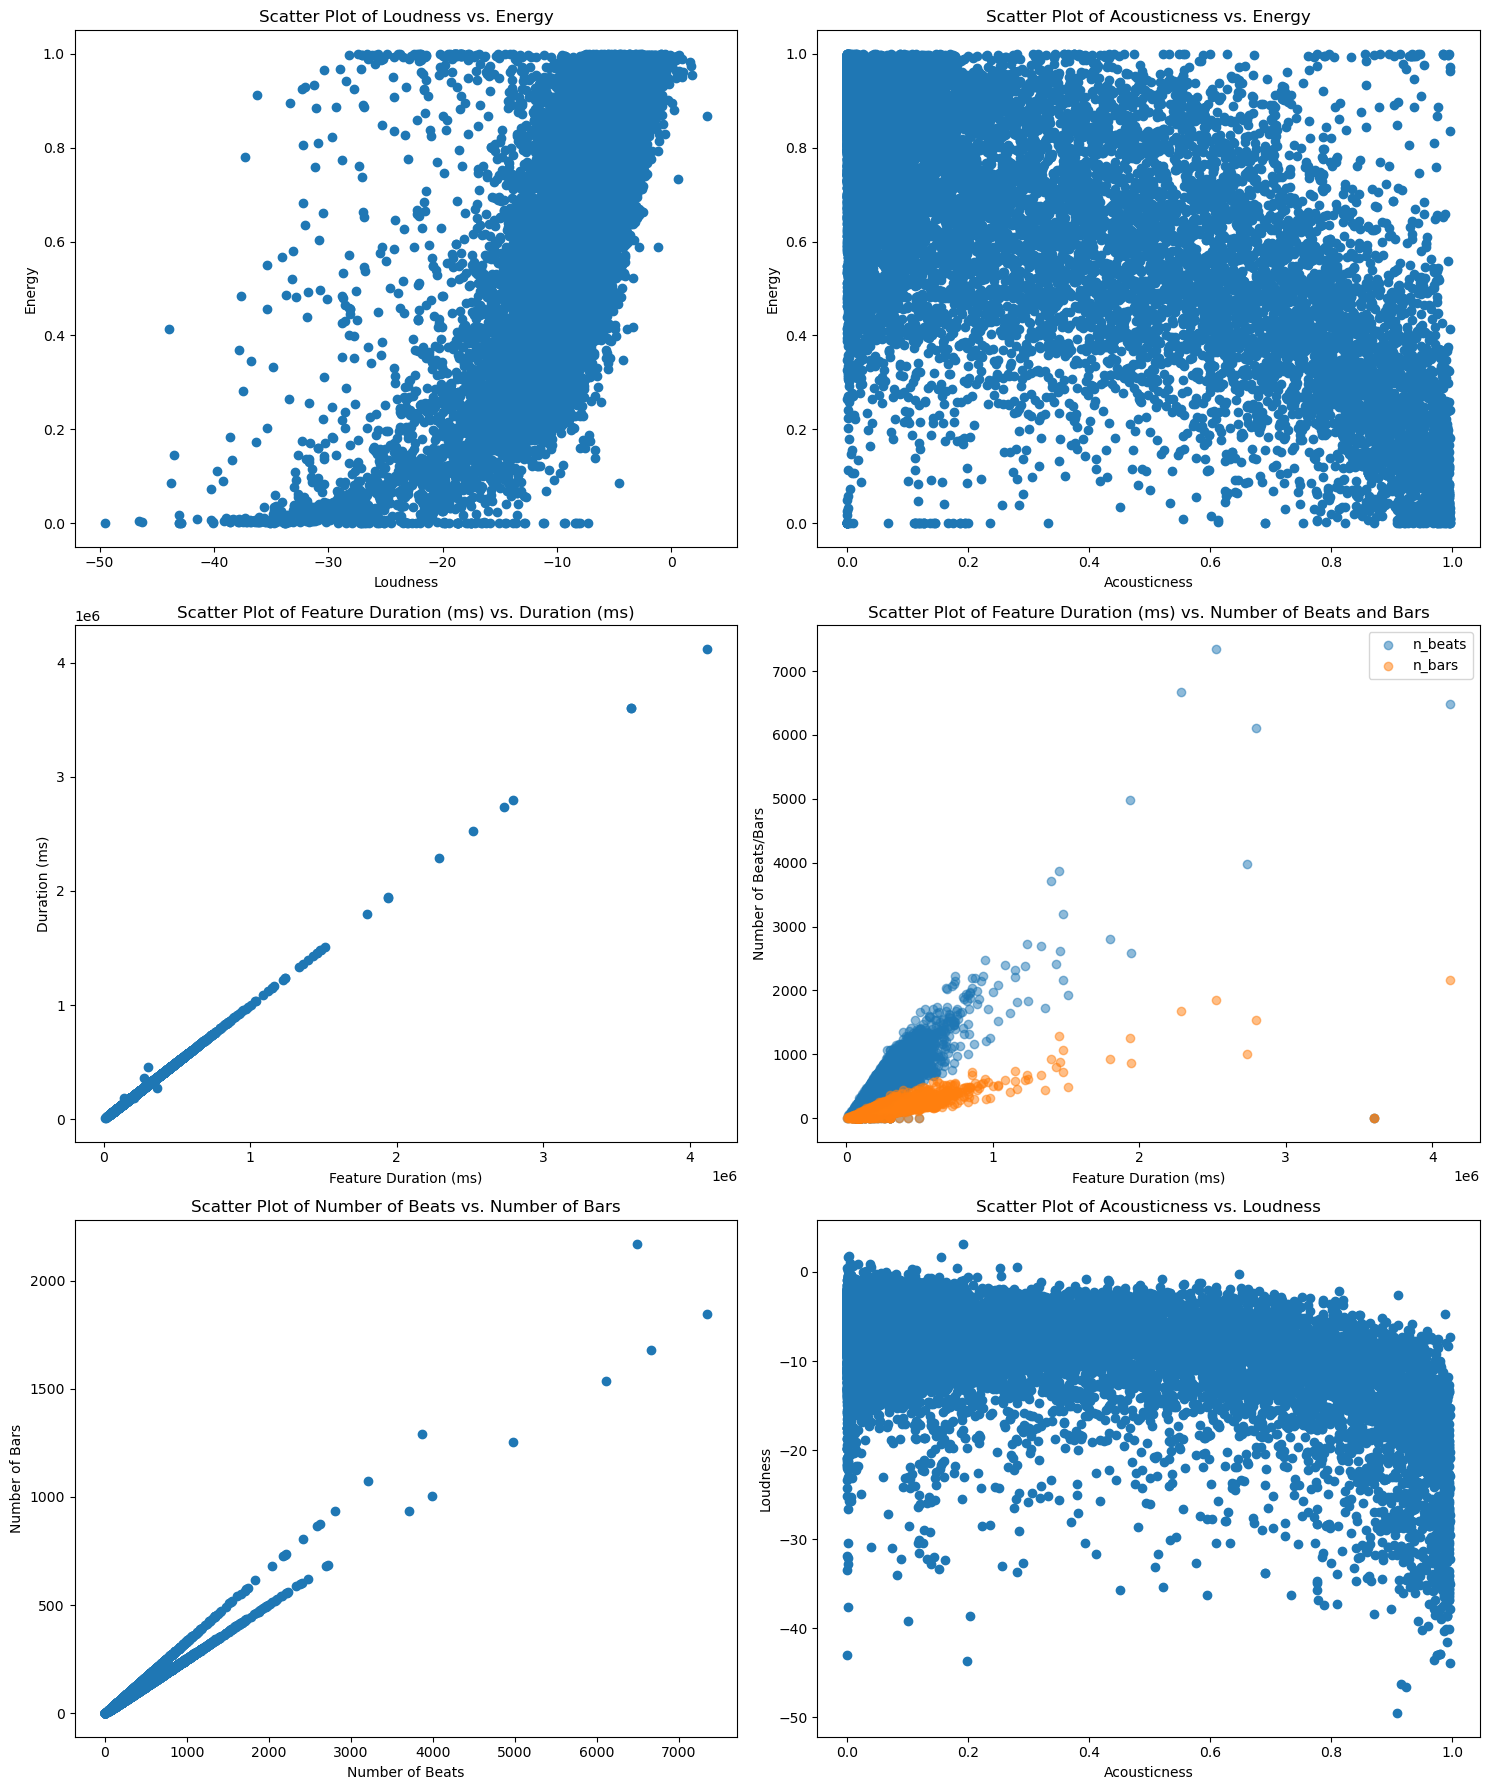

In [71]:
fig = plt.figure(figsize=(15, 18)) 
fig_dims = (3, 2)

plt.subplot2grid(fig_dims, (0, 0))
plt.scatter(df['loudness'], df['energy'])
plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.title('Scatter Plot of Loudness vs. Energy')

plt.subplot2grid(fig_dims, (0, 1))
plt.scatter(df['acousticness'], df['energy'])
plt.xlabel('Acousticness')
plt.ylabel('Energy')
plt.title('Scatter Plot of Acousticness vs. Energy')

plt.subplot2grid(fig_dims, (1, 0))
plt.scatter(df['features_duration_ms'], df['duration_ms'])
plt.xlabel('Feature Duration (ms)')
plt.ylabel('Duration (ms)')
plt.title('Scatter Plot of Feature Duration (ms) vs. Duration (ms)')

plt.subplot2grid(fig_dims, (1, 1))
plt.scatter(df['features_duration_ms'], df['n_beats'], alpha=0.5, label='n_beats')
plt.scatter(df['features_duration_ms'], df['n_bars'], alpha=0.5, label='n_bars')
plt.xlabel('Feature Duration (ms)')
plt.ylabel('Number of Beats/Bars')
plt.title('Scatter Plot of Feature Duration (ms) vs. Number of Beats and Bars')
plt.legend()

plt.subplot2grid(fig_dims, (2, 0))
plt.scatter(df['n_beats'], df['n_bars'])
plt.xlabel('Number of Beats')
plt.ylabel('Number of Bars')
plt.title('Scatter Plot of Number of Beats vs. Number of Bars')

plt.subplot2grid(fig_dims, (2, 1))
plt.scatter(df['acousticness'], df['loudness'])
plt.xlabel('Acousticness')
plt.ylabel('Loudness')
plt.title('Scatter Plot of Acousticness vs. Loudness')

plt.tight_layout()
plt.show()


- Loudness vs. Energy: There is a powerful correlation between loudness and energy, indicating louder tracks are generally more energetic.
- Acousticness vs. Energy: A strong negative correlation exists, suggesting that more acoustic tracks tend to be less energetic.
- Duration_ms vs. Feature_duration_ms: An almost perfect correlation, showing that these two features are closely related or identical.
- Feature_duration_ms vs. N_beats/N_bars: A strong correlation indicating longer tracks have more beats and bars.
- N_beats vs. N_bars: The correlation is nearly perfect, reflecting a fixed proportion between beats and bars in a track.
- Acousticness vs. Loudness: A moderate negative correlation is observed, where more acoustic tracks are generally quieter.

## Missing values

In [15]:
print(df.isnull().sum())

name                         0
duration_ms                  0
explicit                     0
popularity                   0
artists                      0
album_name                   0
danceability                 0
energy                       0
key                          0
loudness                     0
mode                      4450
speechiness                  0
acousticness                 0
instrumentalness             0
liveness                     0
valence                      0
tempo                        0
features_duration_ms         0
time_signature            2062
n_beats                      0
n_bars                       0
popularity_confidence    12783
processing                   0
genre                        0
dtype: int64


These attributes have some missing values:

- mode: 4450
- time_signature: 2062
- popularity_confidence: 12783

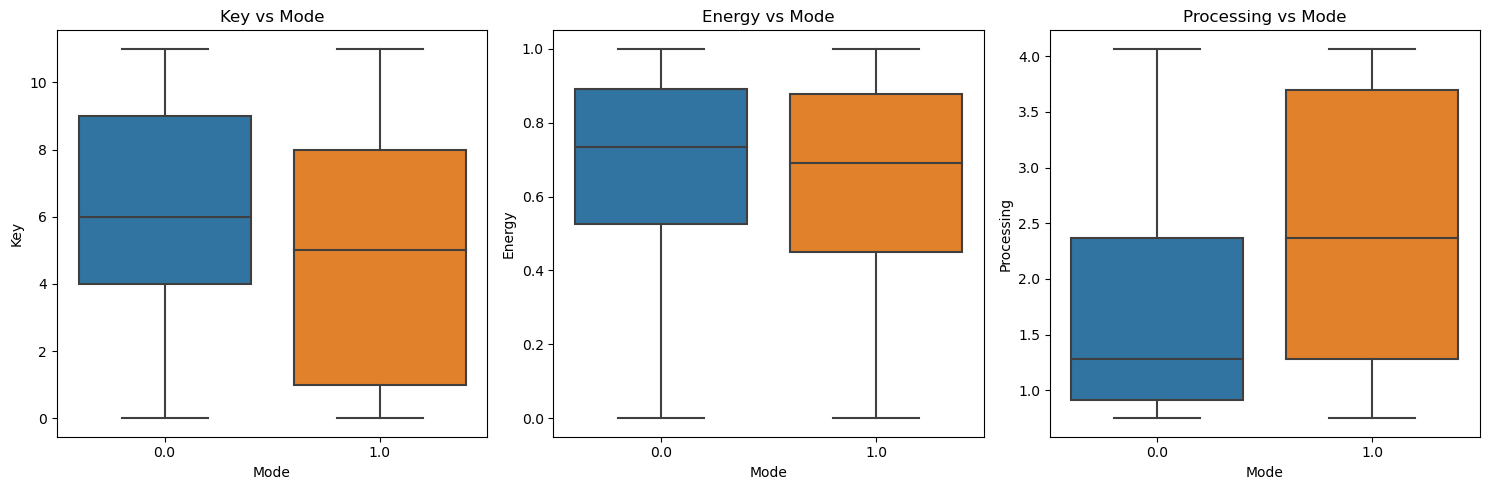

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.boxplot(x='mode', y='key', data=df, ax=axs[0])
axs[0].set_title('Key vs Mode')
axs[0].set_xlabel('Mode')
axs[0].set_ylabel('Key')

sns.boxplot(x='mode', y='energy', data=df, ax=axs[1])
axs[1].set_title('Energy vs Mode')
axs[1].set_xlabel('Mode')
axs[1].set_ylabel('Energy')

sns.boxplot(x='mode', y='processing', data=df, ax=axs[2])
axs[2].set_title('Processing vs Mode')
axs[2].set_xlabel('Mode')
axs[2].set_ylabel('Processing')

plt.tight_layout()
plt.show()


## Outliers

I create a new attribute called "num_artists" that counts how many artists made a track and I see the distribution of the number of artists in any song

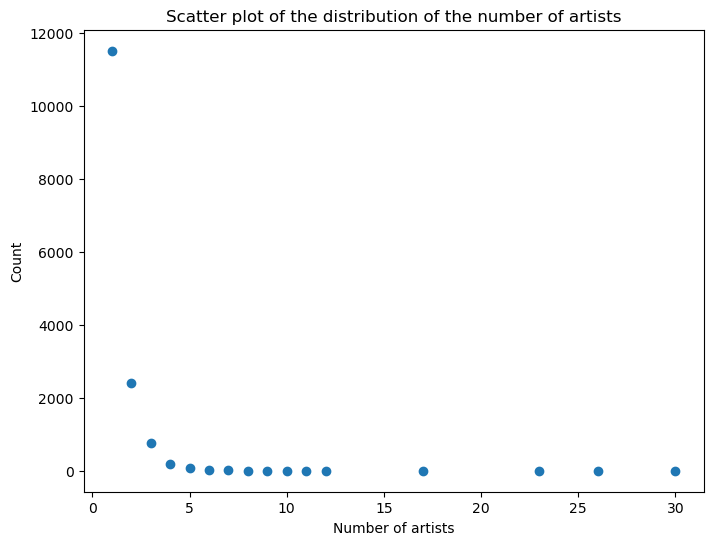

In [17]:
df['num_artists'] = df['artists'].str.split(';').apply(len)
artist_counts = df['num_artists'].value_counts().sort_index()

plt.figure(figsize=(8, 6))

plt.scatter(artist_counts.index,  artist_counts.values)  # Plotting sepal width against petal length.
plt.ylabel('Count')
plt.xlabel('Number of artists')
plt.title('Scatter plot of the distribution of the number of artists')
plt.show()

## Visualization

Continuos attributes

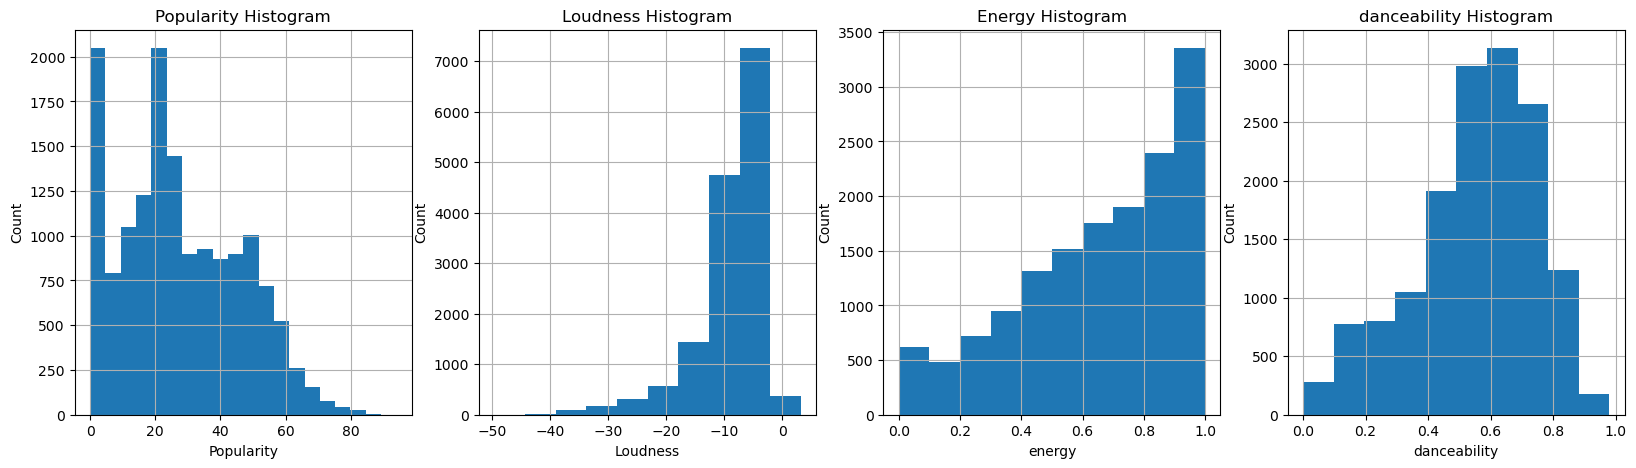

In [69]:
fig = plt.figure(figsize=(20, 5)) 
fig_dims = (1, 4)

# I use 20 as the number of bins to represent better the granularity
plt.subplot2grid(fig_dims, (0, 0))
df['popularity'].hist(bins=20)
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.title('Popularity Histogram')

sturges_bins=(int(math.log(len(df)))+1)

plt.subplot2grid(fig_dims, (0, 1))
df['loudness'].hist(bins=sturges_bins)
plt.xlabel('Loudness')
plt.ylabel('Count')
plt.title('Loudness Histogram')

plt.subplot2grid(fig_dims, (0, 2))
df['energy'].hist(bins=sturges_bins)
plt.xlabel('energy')
plt.ylabel('Count')
plt.title('Energy Histogram')

plt.subplot2grid(fig_dims, (0, 3))
df['danceability'].hist(bins=sturges_bins)
plt.xlabel('danceability')
plt.ylabel('Count')
plt.title('danceability Histogram')

plt.show()

Questo è solo per vedere i bins con sturges e natural binning

In [64]:
max_loudness=max(df["loudness"])
min_loudness=min(df["loudness"])
print(int((max_loudness-min_loudness) / (math.log(len(df))+1)))
print((math.log(len(df)))+1)

4
10.615805480084347


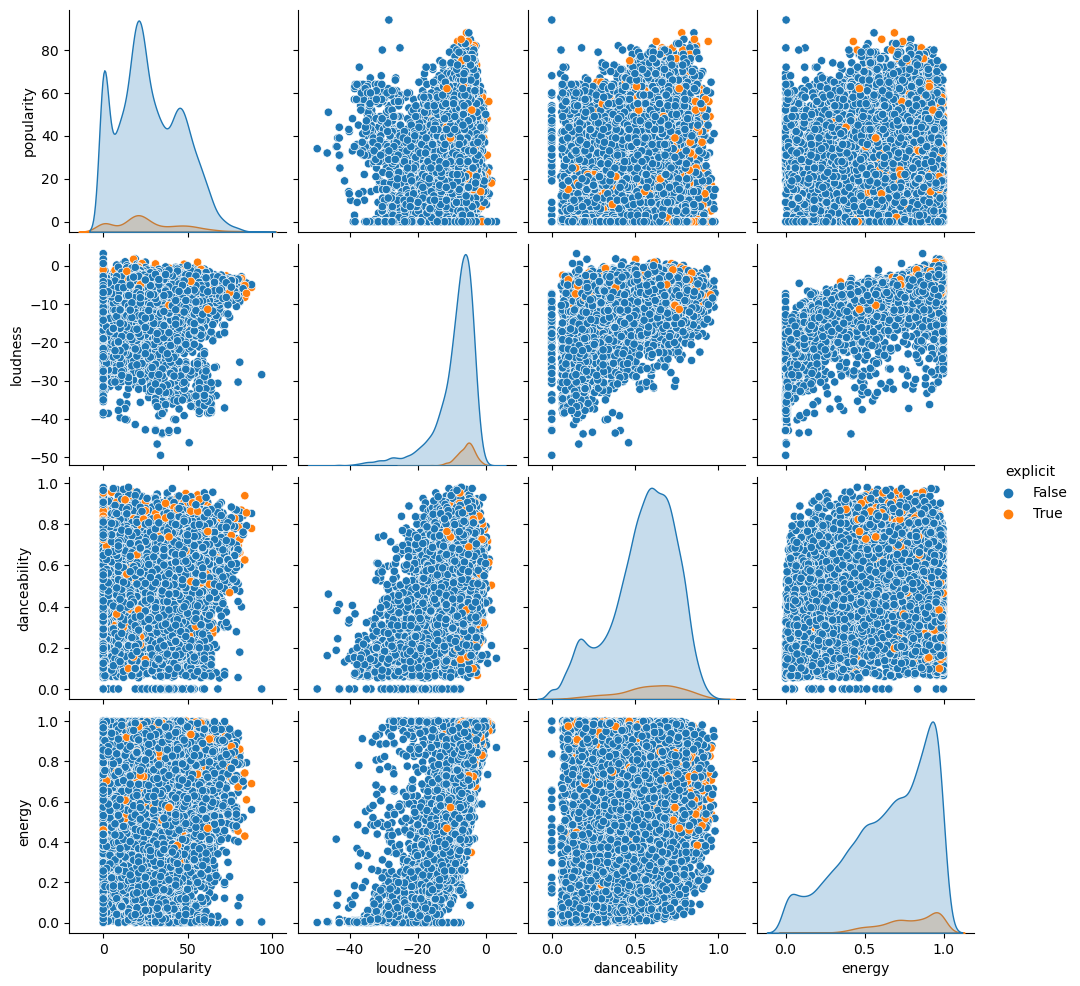

In [45]:
sns.pairplot(df[['popularity', 'loudness', 'danceability', 'energy', 'explicit']], hue="explicit", diag_kind="kde")
plt.show()

- Popularity: Explicit tracks have a wider range and slightly higher mean in popularity, indicating they might be more popular overall.
The popularity distribution is right-skewed, meaning most songs have moderate popularity, with fewer songs achieving very high popularity.

- Loudness: Explicit tracks tend to be louder on average.
Loudness distribution for both explicit and non-explicit tracks is left-skewed, focusing on higher loudness values.

- Danceability: Explicit tracks tend to be more danceable.
The danceability distribution for both is relatively normal with a slight right skew, indicating a general preference for danceable tracks.

- Energy: Explicit tracks are generally more energetic.
Energy shows a fairly normal distribution for both categories, leaning slightly towards higher energy.

- Inter-variable Relationships: Danceability and Energy: A moderate positive correlation, suggesting that more energetic tracks are more danceable.
Popularity and Loudness: There's a slight indication that louder tracks are more popular.
Danceability and Loudness: Slightly more danceable tracks tend to be louder.

- Explicit Content: Explicit content seems to influence the tracks' characteristics, making them more popular, louder, more danceable, and more energetic.